In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt

In [2]:
TEU_Area = pd.read_csv('ShipAreatoTEU.csv', header=0)
TEU_Area

TEU  Length (m)  Width (m)  Ship Area(m2)    TEU_2   CO2
0   13000         366       50.0        18300.0  18000.0   3.1
1   10000         335       48.0        16080.0   8000.0  12.5
2    8500         335       42.0        14070.0   5500.0  16.6
3    6478         318       40.0        12720.0   2500.0  20.0
4    6589         305       40.0        12200.0   1500.0  32.1
5    6730         304       40.0        12160.0    500.0  36.3
6    6188         299       40.0        11960.0      NaN   NaN
7    5050         294       32.0         9408.0      NaN   NaN
8    4650         292       32.0         9344.0      NaN   NaN
9    4112         280       32.0         8960.0      NaN   NaN
10   5514         278       40.0        11120.0      NaN   NaN
11   4616         264       32.0         8448.0      NaN   NaN
12   3217         243       32.0         7776.0      NaN   NaN
13   2400         225       24.0         5400.0      NaN   NaN
14   2570         211       29.0         6119.0      NaN   NaN
15   2500         207       30.0         6210.0      NaN   NaN
16   1330         192       20.0         3840.0      NaN   NaN
17   1260         192       20.0         3840.0      NaN   NaN
18   2500         189       28.0         5292.0      NaN   NaN
19   2130         171       27.0         4617.0      NaN   NaN
20    860         155       17.5         2712.5      NaN   NaN
21   1100         148       23.5         3478.0      NaN   NaN
22    392         120       22.0         2640.0      NaN   NaN
23    362         118       20.0         2360.0      NaN   NaN
24    500         118       16.5         1947.0      NaN   NaN
25    320         100       20.0         2000.0      NaN   NaN
26    167          90       17.0         1530.0      NaN   NaN
27     80          55       12.2          671.0      NaN   NaN

In [3]:
X = np.array(TEU_Area['Ship Area(m2)'].to_list()).reshape(-1,1)
y = np.array(TEU_Area['TEU'].to_list()).reshape(-1,1)

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'TEU vs. Ship Area')

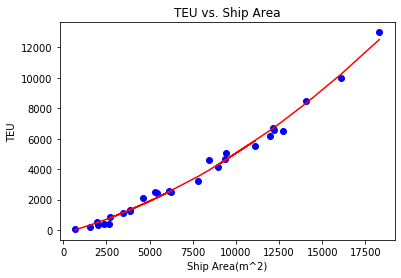

In [4]:
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.xlabel('Ship Area(m^2)')
plt.ylabel('TEU')
plt.title('TEU vs. Ship Area')

Text(0.5, 1.0, 'CO2 Efficiency vs. TEU')

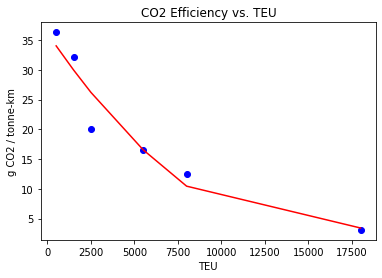

In [5]:
X1 = np.array(TEU_Area['TEU_2'].iloc[:6].to_list()).reshape(-1,1)
y1 = np.array(TEU_Area['CO2'].iloc[:6].to_list()).reshape(-1,1)

poly1 = PolynomialFeatures(degree = 2) 
X_poly1 = poly1.fit_transform(X1) 
  
poly1.fit(X_poly1, y1) 
lin3 = LinearRegression() 
lin3.fit(X_poly1, y1) 
plt.scatter(X1, y1, color = 'blue') 
plt.plot(X1, lin3.predict(poly1.fit_transform(X1)), color = 'red') 
plt.xlabel('TEU')
plt.ylabel('g CO2 / tonne-km')
plt.title('CO2 Efficiency vs. TEU')
#plt.plot(X1, lin3.predict(X1), color = 'red')

In [6]:
print('Area-TEU Coefs: ', lin2.coef_)
print('Area-TEU Intercept: ', lin2.intercept_)
print('TEU-CO2 Coefs: ', lin3.coef_)
print('TEU-CO2 Intercept: ', lin3.intercept_)

Area-TEU Coefs:  [[0.00000000e+00 3.17688908e-01 2.06756025e-05]]
Area-TEU Intercept:  [-219.2003311]
TEU-CO2 Coefs:  [[ 0.00000000e+00 -4.32978571e-03  1.39479467e-07]]
TEU-CO2 Intercept:  [36.15242554]
